In [1]:
include("../scripts/mcl.jl")

draw (generic function with 7 methods)

In [26]:
function sigma_ellipse(p, cov, n)
    eig_vals= eigvals(cov)
    eig_vec = eigvecs(cov)
    ang = atan(eig_vec[1,:][2], eig_vec[1,:][1])/pi * 180
    return patches.Ellipse(p, width=2*n*sqrt(eig_vals[1]), 
        height=2*n*sqrt(eig_vals[2]), angle=ang, fill=false, color="blue", alpha=0.5)
end

sigma_ellipse (generic function with 1 method)

In [11]:
mutable struct KalmanFilter
    belief
    pose
end

In [12]:
function KalmanFilter_(envmap, init_pose, motion_noise_stds=Dict("nn"=>0.19, "no"=>0.001, "on"=>0.13, "oo"=>0.2))
    self = KalmanFilter(ntuple(x->nothing, fieldcount(KalmanFilter))...)
    self.belief = MvNormal([0.0,0.0, pi/4], Diagonal([0.1, 0.2, 0.01]))
    self.pose = self.belief.μ
    return self
end

KalmanFilter_ (generic function with 2 methods)

In [13]:
function motion_update(self::KalmanFilter, nu, omega, time)
end

motion_update (generic function with 3 methods)

In [14]:
function observation_update(self::KalmanFilter, observation)
end

observation_update (generic function with 3 methods)

In [19]:
x = [1 2 3;
        4 5 6;
        7 8 9]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [29]:
function draw(self::KalmanFilter, ax, elems)
    e = sigma_ellipse(self.belief.μ[1:2], self.belief.Σ[1:2, 1:2], 3)
    elems = vcat(elems, [ax.add_patch(e)])
    
    x,y,c = self.belief.μ
    sigma3 = sqrt(self.belief.Σ[3,3])*3
    xs = [x + cos(c-sigma3), x, x + cos(c+sigma3)]
    ys = [y + sin(c-sigma3), y, y + sin(c+sigma3)]
    elems = vcat(elems, ax.plot(xs, ys, color="blue", alpha=0.5))
end

draw (generic function with 8 methods)

In [30]:
function trial()
    time_interval = 1.0
    world = World_(30, time_interval, false)
    
    m = Map()
    for ln in [[-4.0, 2.0], [2.0, -3.0], [3.0, 3.0]]
        append_landmark(m, Landmark(ln))
    end
    append(world, m)
    
    initial_pose = [0.0, 0.0, 0.0]
    kf = KalmanFilter_(m, initial_pose)
    a = EstimationAgent_(time_interval, 0.2, 10.0/180*pi, kf)
    r = Robot_(initial_pose, sensor=Camera_(m), agent=a, color="red")
    append(world, r)
    draw(world)
    showanim("test.mp4")
end

trial (generic function with 1 method)

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAcq5tZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTggLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAIRtliIQAF//+99S3zLLtU2+2C6j3op4mX0N1JQGblsTtOoAAAAMAAAMAAB68FzgCX4kK868AAAMAyoAXqEn/CmOPiA7BC5NJlvfhKIWPSXi/zA6JYDLoQAMQkginty7NGv2twoUk3+x++sOjYLO23GkLnX3zZEYn6a9vQcRQLf67K7SBvVrJ/o4DfjcfmL80ItpTpOBk9UoqIRYyXX9Jp26SG/qkhzXvDYJnUDUkXMWTV9xgIkId/B0DL63tzWtJoDT3qBLshsubVeON8CDX6ibsLgVVQ4A0D7tGbVkDzT/KsUAH7fA8ber7HvEJfThyzrLkSWNw9QjQzXk0jYHioNxDFOC0u5P/6flbarG27qxKpcR1g3jAe/uyNQkdibir9L1oZNoxCL9nTz5Do7WCxbfdwBz786P6Gt3+a9qFmQoe2Qlbs6zkxnOY8FmvubMXtnqJ20rtvpHrl79t6nq8q+9ZGR6BdRh00t3Aigy2K6jkGX8xF2NbE0107yMuMhNJ8nLf3bEUDA1W0TIui6TwnLCPxsZoeNH9a4AHuu+fRe2d9XIIXx50n+Od5FnEb6C9gPt3e826oHE1AgcXxvRCBxQI/BeMobygLn0j9VWXolTLRr1nefL0lQJDHRd0bMQ2bwJ+rzm8Mp/b24dtpJKsQryCKzCJcKad8rXWcKOAUajWn2P0NKgXGBFwI0M+idp/QrLQJJggEup5GqdX9LpivTz0Tg/GtPHRN/r0yThMt621zn7a4ylSl42LRaw5MezwM/+4GZwzEqm3AEN61OX4+ROEd9aArigTp3XWPCo1M3arBFgwglcnHb1e8ZbqIj4YaLbonxrArOWHmfSfBqXWPde/WRktmyHhQ5zaphFSjYU0Lns11vXjU1ONMVKVbNEfaKST3u+nzCLmQVjsoOK4fNxLvubsCygriI+/cKxxNVwhwMxig92FhVnxjeW0Qawhd7VT1zV28fRz3/DogADuAEMPhpq/RpKDv1qbZOKePOPffYRkCZ45FUWjVqZpelcn4ZADCZ5v4oynHm5NxE59pKbJ9JAsOPBdsd2kCu71nJq/EQYHSrbPdz4PH+mJYSEYOMqie4UU1ScJ/8DR6ND9jmSeOTLo4sh6JMZTDsgmMjiZqxotT4a/hxHfEupEYr4JwU4Vxzm/7S98Zg8N9S7JPyWDhPU3xZQklMgfm/wYdLHCTtRfKP7NdF12xWJtkKno7Kpra6QfW6uS5NohOTrHYi1QKJpwt4N6q1NFTZEINe5g3roZ3hBuhm45FVeZthTHPMarOUDfW4LgqacaabU+lIw6K0Kafl/pGLQ5S4xUfHpIxAxd3dvo+wd0w9UsWWLyGTQe6iptBTdFO3cd37VoNJIBSyrnVCZlOgQo+3mCLnlBHG8i5fwZp8RlVRWJQVv6BQarerxO8aBRS7QLzlkASjaG5nHHRRU4V+oHhagdcHTjZQthHRsjQmM4TRMsSP8CVDXj0XKLE/d+Ho2WGVQPIWycp2lRDj3kimnt2BJ1jP1cBHTa0hZ2nEKPJbIhIVHjpNivlSLCVOqTMeAE/ZSxIvxNsS/lb2mr9vj3tlOoIRgQyngwOARvZuitbG/5OjVwBryO7XsuEzZ2t04MiXEU1V7QLe6QEWxunPxgJPbvfphN9PJpbRY+PsHK1SvBPmCT1vLGP+CSHyEkcCZf17pDKlLy3vv3JdjJzbz3MD8sfAqrS/7YxyVM7BSqV1r5HAnGih9KgGJcncjtPTkpSdagOoBBFAdUyy0CT7Xl24lIE3TJCT5oLqyh+5N17FuiOtlapKd+PTzeda4TE+xtI+63Jtd0FiJJl6mBky9s5u1j8MBAsVsum0+quprOe9lSQwcz7WNbkcuwcMwngflcYbwGreZc64KoSTh1GnokvLMqHnUghYfkiYHZM2pPwkhsZACKmZDW8ggl9PS6tnZLxYBw+YjyOZwBHCkgccnF8iwcVtKNHw3HtT2QGY1ad0yPQ7eKh+CUwmtaCXyiUXTxBVHHBbuP/sZE6AMwFcbn+/ZxmyRO+bfDvuISLM9nrarvPxAvNKnembuAPHn2w9ykQO3eaMSFXZ2lsViHxSdZrUB1rB6l2rY4aLbvTx76skiXpD/kbl07jpCnmf7keN/HKe+tVMSLTZvZ/ZD8cmkuuVi1Ldy/EBWtHa57gZUfJ7a2XBjF7tuSdGQUPS315AW6lMrcOhGzUyUSfGPZKIDBbMaKDJA9fYhTrkfyo+n8qQBPgvf3iILyPK7d1SF4UlV7Zql+fMVjuOPKtVu8fsBLY1CBAL+ZLJmfEri68yEJ7LnqnOg9G5Dc3tXhETt4FdCp40IewGFHm2ZhEK7jd7izN7xdfXwv0Jlw4KSh2FaRzlhI02UrFOv1mZl5iG8NxWlA4+b7PmaZ4tdoKMEmJADDXM+wWBLP/KYPGi814+o3svFBIWOBvr2v4RJMOytDvMPD/svdrxZ33QTknHWgASLR+FqhTH/UTXnPIG+RBXA5mEpriM0Dwzi8B172RpzqeX+mQ2FG/78JEygIQs+w1Q55rg1Em8WiQxPP3ESLUsqcL9ssFGdLOqRxFGGg1igf9djk56S9dD5sp/RSRhdEFiBOQZLXRAIbqJcWKMQO1D4Z+LLV0Vc5SalyTFQW0kK3NOuEFzJVjCdCWr2qSTpKiYn8Bom0VZG2bCRQgDyiWUh6npf1Dr5GSTmu8aeJ+fhM78sbfw7jy8CJDeE2c8PExfNP3xhVAcRLW45hIcRERLqKrh/oghsJVQw4VY8zzdq2I2KxoYcLf4VrqLMD9Ii6FRK+3yQAFRgi9i2VPt2PbPvoWTJgfT9n+rVfB4BnSZDGjwiJv+HNoqx5dfpQIxO0LIpTyPwx9HtTNszO+j41eJn2yeQuC01Dn0VhPkxp0KepKctFsNNgRAaFp/dSoNRpdq6ZUIY/Iv+6Wdl5pyWRtMYGEpN6Ye9vvArI2OvGfj+zMfzdqAeHdYBTZAPmQJUDXayln3WIoT2

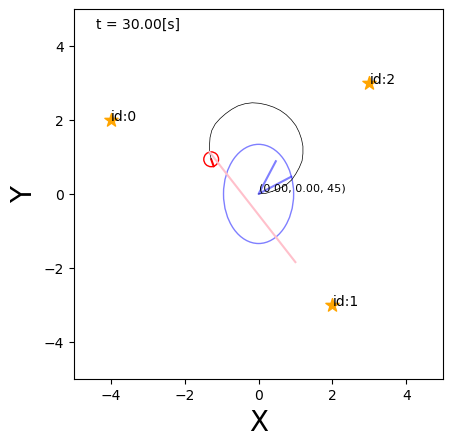

In [31]:
trial()